# Machine Learning Foundation Nanodegree


# Project: Investigation of TMDb Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> 
>Here, I will be carrying out analysis of the TMDb dataset,containing information about 10,000 movies including its cast, popularity and revenue generated.
>Let's get started with first loading the csv file into the dataframe to get insight of the data.
>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

df = pd.read_csv('tmdb-movies.csv')
df.shape

(10866, 21)

In [2]:
#glimpse of the database's last 3 rows of the data

df.tail(3)

id    imdb_id  popularity  budget  revenue  \
10863  39768  tt0060161    0.065141       0        0   
10864  21449  tt0061177    0.064317       0        0   
10865  22293  tt0060666    0.035919   19000        0   

                 original_title  \
10863       Beregis Avtomobilya   
10864    What's Up, Tiger Lily?   
10865  Manos: The Hands of Fate   

                                                    cast homepage  \
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...      NaN   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...      NaN   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...      NaN   

               director                                       tagline  \
10863    Eldar Ryazanov                                           NaN   
10864       Woody Allen                     WOODY ALLEN STRIKES BACK!   
10865  Harold P. Warren  It's Shocking! It's Beyond Your Imagination!   

          ...                                                overview runtime  \
10863     ...       An insurance agent who moonlights as a carthie...      94   
10864     ...       In comic Woody Allen's film debut, he took the...      80   
10865     ...       A family gets lost on the road and stumbles up...      74   

               genres     production_companies release_date vote_count  \
10863  Mystery|Comedy                  Mosfilm       1/1/66         11   
10864   Action|Comedy  Benedict Pictures Corp.      11/2/66         22   
10865          Horror                Norm-Iris     11/15/66         15   

       vote_average  release_year     budget_adj  revenue_adj  
10863           6.5          1966       0.000000          0.0  
10864           5.4          1966       0.000000          0.0  
10865           1.5          1966  127642.279154          0.0  

[3 rows x 21 columns]

The dataset contains 10866 movie records with 21 different types of information from movie name, cast, to their budget and revenue. With this data, number of patterns can be identified in the movie industry.Moreover, we can also look for similar properties that make a movie blockbuster!

In this report, the following questions have been adressed for the TMDb dataset...

>**Questions that can be answered from this dataset :**<br>
>**General Questions for all movies:**<br>
>1) What is the average runtime of movie?<br>
>2) In movie industry, which year saw the maximum total profit?<br>
>**Analysing parameters for only blockbuster movies :**<br>
>1) What is the average runtime of a blockbuster movie?
<br>
>2) Which genre has more blockbuster movies?
<br>
>3) Which actor/actress has more blockbuster movies?
<br>
>4) Which director gave more blockbuster movies?
<br>
>5) Where in the budget range do most blockbusters lie?
>
>**Note:** A movie cannot have 0 budget and 0 revenue, hence we have to change all zero values in budget and revenue column to NaN  before we carry out any analysis. This discrepancy is eliminated int the following section of data-cleaning.

<a id='wrangling'></a>
## Data Wrangling

>Before we start analysis process,the dataset must be cleaned to check and handle null, duplicated rows, and trim any unnecessary columns. 


In [3]:
#getting more insight into data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### 1)Deleting Unnecessary Columns
For the questions mentioned above, not all information is required in analysis. For example, information regarding the tagline, homepage, overview, popularity and other voting parameters are little to no use. Without much further ado, lets clean up the clutter!

In [4]:
cols_to_delete=['id','tagline', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies','imdb_id','popularity','release_date','vote_count','vote_average']
df=df.drop(cols_to_delete,1)
df.head(3)

budget     revenue      original_title  \
0  150000000  1513528810      Jurassic World   
1  150000000   378436354  Mad Max: Fury Road   
2  110000000   295238201           Insurgent   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   

   runtime                                     genres  release_year  
0      124  Action|Adventure|Science Fiction|Thriller          2015  
1      120  Action|Adventure|Science Fiction|Thriller          2015  
2      119         Adventure|Science Fiction|Thriller          2015


### 2) Deleting Duplicates

Duplicates, if present in a data and left unhandled in data analysis, can lead to misleading interpretations. So lets check if there are any duplicates present in the data, and make sure we delete the duplicate data before we start our ananlysis...

In [5]:
#finding number of duplicates
sum(df.duplicated())

1

There is only one duplicate row, hence we will drop the duplicated row and keep the first one.

In [6]:
df.drop_duplicates(inplace=True)

#checking for duplicates
sum(df.duplicated())

0

Since there are 0 duplicates, it means we have taken care of the duplicate values.<br>
Now, lets clean up the null values in the data.

### 3)Handling Null Values

First, lets deal with the previously mentioned discrepancy of zero-budget and zero-revenue records. We need to drop all such records.

In [7]:
#list of column that must be checked for 0
check_zero_cols = ['budget', 'revenue']

#replacing 0 with NaN
df[check_zero_cols] = df[check_zero_cols].replace(0, np.NaN)

# drop row which has NaN values in any of the column of the list
df.dropna(subset = check_zero_cols, inplace = True)

df.shape

(3854, 8)

>Now, Only 3854 movie records remain for our further analysis. Data seems enough to make interpretations regarding patterns in movie industry...

In [8]:
#checking data after removal of zero values
df.tail(2)

budget     revenue    original_title  \
10835  12000000.0  20000000.0  The Sand Pebbles   
10848   5115000.0  12000000.0  Fantastic Voyage   

                                                    cast           director  \
10835  Steve McQueen|Richard Attenborough|Richard Cre...        Robert Wise   
10848  Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...  Richard Fleischer   

       runtime                              genres  release_year  
10835      182  Action|Adventure|Drama|War|Romance          1966  
10848      100           Adventure|Science Fiction          1966

Now, since runtime can also have zero discrepancy, we change all the zero values to NaN for runtime column too.

In [9]:
#replacing 0 with NaN
df['runtime'] = df['runtime'].replace(0, np.NaN)

If data types are consistent with the type of information they represent, allows cleaner and smoother approach to data analysis. Lets start with viewing the datatypes of each column:

In [10]:
#glimpse of the database's first 3 rows of the data
df.head(3)

budget       revenue      original_title  \
0  150000000.0  1.513529e+09      Jurassic World   
1  150000000.0  3.784364e+08  Mad Max: Fury Road   
2  110000000.0  2.952382e+08           Insurgent   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   

   runtime                                     genres  release_year  
0      124  Action|Adventure|Science Fiction|Thriller          2015  
1      120  Action|Adventure|Science Fiction|Thriller          2015  
2      119         Adventure|Science Fiction|Thriller          2015

In [11]:
df.dtypes

budget            float64
revenue           float64
original_title     object
cast               object
director           object
runtime             int64
genres             object
release_year        int64
dtype: object

Upon careful inspection, both budget and revenue need not have precision of float, simply int would suffice as their dataypes. Thus, lets transform budget and revenue from float to int.

In [12]:
change_type_cols = ['budget', 'revenue']

df[change_type_cols] = df[change_type_cols].applymap(np.int64)
df.dtypes

budget             int64
revenue            int64
original_title    object
cast              object
director          object
runtime            int64
genres            object
release_year       int64
dtype: object

Lastly, here we have assumed that the revenue, budget is in Dollars($). Thus, lets rename these columns with a more meaningful column name.

In [13]:
#renaming columns
df.rename(columns = {'budget' : 'budget(US-Dollars)', 'revenue' : 'revenue(US-Dollars)'}, inplace = True)

df.dtypes

budget(US-Dollars)      int64
revenue(US-Dollars)     int64
original_title         object
cast                   object
director               object
runtime                 int64
genres                 object
release_year            int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've trimmed and cleaned our data, let's move on to exploration. Here, we have computed statistics and created visualizations with the goal of addressing the research questions posed in the Introduction section. 

### Question 1 : What is the average runtime of movie?
We can visualize the runtime distribution for all movies with the help of a histogram.

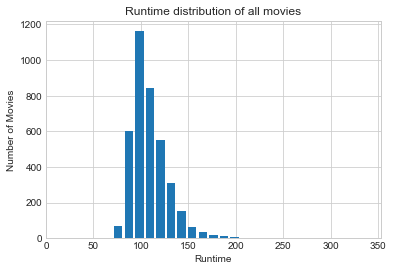

In [14]:
#setting style
sns.set_style('whitegrid')

#labelling graph
plt.xlabel('Runtime')
plt.ylabel('Number of Movies')
plt.title('Runtime distribution of all movies')

#plotting histogram
plt.hist(df['runtime'],rwidth=0.8, bins =29)
plt.show()

To gain more insight about distribution and outliers, we plot a scatter plot.

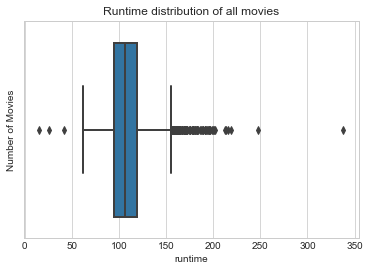

In [15]:

#labelling graph
plt.xlabel('Runtime')
plt.ylabel('Number of Movies')
plt.title('Runtime distribution of all movies')


sns.boxplot(df['runtime'], linewidth = 2)
plt.show()

In [16]:
#getting specific values
df['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

Clearly, both the visualiztions confirm the above specific values.
On average, movies are of 109 minutes. Most movie's runtime's fall in the range of 90 min to 130 min.

### Question 2 : In movie industry, which year had the maximum profits?
Lets see which was the most profitable year in the movie-industry! Firstly, we have to insert a column that contains the profit made by the movie. Profit for a movie can be easily calculated by subtracting budget from the revenue.

In [17]:
#inserting new row for profit
df.insert(2, 'profit(US-Dollars)', df['revenue(US-Dollars)'] - df['budget(US-Dollars)'])

In [18]:
df.dtypes

budget(US-Dollars)      int64
revenue(US-Dollars)     int64
profit(US-Dollars)      int64
original_title         object
cast                   object
director               object
runtime                 int64
genres                 object
release_year            int64
dtype: object

In [19]:
#viewing dataset
df.head(2)

budget(US-Dollars)  revenue(US-Dollars)  profit(US-Dollars)  \
0           150000000           1513528810          1363528810   
1           150000000            378436354           228436354   

       original_title                                               cast  \
0      Jurassic World  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Mad Max: Fury Road  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   

          director  runtime                                     genres  \
0  Colin Trevorrow      124  Action|Adventure|Science Fiction|Thriller   
1    George Miller      120  Action|Adventure|Science Fiction|Thriller   

   release_year  
0          2015  
1          2015

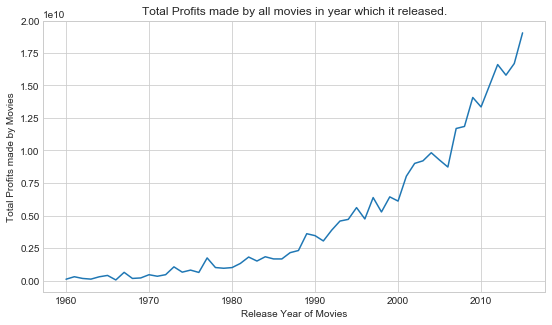

In [20]:
#the groupby function below collects all the movies for that year and then the profits of all those movies for that years is added
profits_by_year = df.groupby('release_year')['profit(US-Dollars)'].sum()

plt.figure(figsize=(9,5))
#labelling
plt.xlabel('Release Year of Movies')
plt.ylabel('Total Profits made by Movies')
plt.title('Total Profits made by all movies in year which it released.')

#plotting
plt.plot(profits_by_year)
plt.show()

In [21]:
#to find the year with maximum total profit
profits_by_year.idxmax()

2015

From the above line-graph, overall, the total profits have been grown from 1960 to 2015. With around total profit of 19 billion US-Dollars, 2015 became the year that witnessed the most profit.

### Analysing parameters for only blockbuster movies :
Given the genre, cast, director, budget, and profits, we can analyze parameters that all the movies that made high profits have in common. We will call movies that made profits equal to or greater than $50M as blockbuster movies...

In [22]:
#assinging new dataframe which holds values only of movies having profit $50M or more
profit_df= df[df['profit(US-Dollars)'] >= 50000000]

#viewing the dataset
profit_df.head(2)

budget(US-Dollars)  revenue(US-Dollars)  profit(US-Dollars)  \
0           150000000           1513528810          1363528810   
1           150000000            378436354           228436354   

       original_title                                               cast  \
0      Jurassic World  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Mad Max: Fury Road  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   

          director  runtime                                     genres  \
0  Colin Trevorrow      124  Action|Adventure|Science Fiction|Thriller   
1    George Miller      120  Action|Adventure|Science Fiction|Thriller   

   release_year  
0          2015  
1          2015

In [23]:
profit_df.shape

(1338, 9)

With dataset of thousands of blockbuster movies, lets dig deep to find out similar characteristics of these movies...

### Question 1 : What is the average runtime of a blockbuster movie?

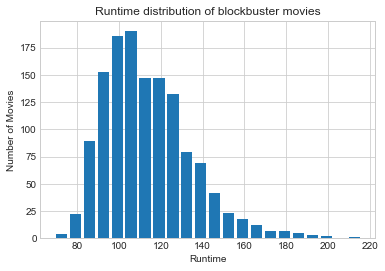

In [24]:
#setting style
sns.set_style('whitegrid')

#labelling graph
plt.xlabel('Runtime')
plt.ylabel('Number of Movies')
plt.title('Runtime distribution of blockbuster movies')

#plotting histogram
plt.hist(profit_df['runtime'],rwidth=0.8, bins =22)
plt.show()

In [25]:
profit_df['runtime'].mean()

113.66741405082212

From the above histogram of runtime for blockbuster movies, most blockbusters are having runtimes between 90 to 120, with an average of 114 min. 

### Question 2 : Which genre has more blockbuster movies?

Many of the following questions involve similar manipulation of data, therefore, a function 'count_data' is created that maps data-values to its count for a given column.

In [26]:

#function which will take any column as argument from which data is to be counted according to the data-values 
def count_data(column_name):
    #take a column, and separate the string by '|'
    data = profit_df[column_name].str.cat(sep = '|')
    
    #generating a pandas series for storing the values separately
    data = pd.Series(data.split('|'))
    
    #this will give us values in descending order
    count = data.value_counts(ascending=False)
    
    return count

In [27]:
count_genre_wise = count_data('genres')
# viewing top 5
count_genre_wise.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

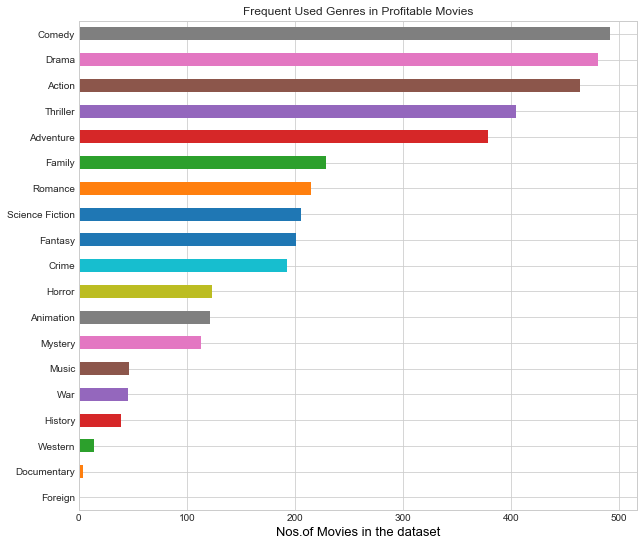

In [28]:
# plotting points in descending order 
count_genre_wise.sort_values(ascending = True, inplace = True)

#ploting
lt = count_genre_wise.plot.barh()

lt.set(title = 'Frequent Used Genres in Profitable Movies')
lt.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '13')
lt.figure.set_size_inches(10, 9)

#ploting
plt.show()

Most blockbusters belong to comedy genre with nearly 500 hit movies. The next blockbuster category of movie is drama, followed by action. It can be interpreted that very few documentary movies have made to the $50M mark to be a blockbuster.

### Question 3 :Which actor/actress has more blockbuster movies?

In [29]:
count_cast_wise = count_data('cast')
# viewing top 5
count_cast_wise.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

Tom Cruise has given the most blockbuster hits. In the actress category, Cameron Diaz has given the most blockbster hits. 

### Question 4 : Which director gave more blockbuster movies?

In [30]:
count_director_wise = count_data('director')
# viewing top 5
count_director_wise.head()

Steven Spielberg    23
Robert Zemeckis     13
Clint Eastwood      12
Tim Burton          11
Ron Howard          10
dtype: int64

Steven Spielberg has directed the most blockbuster hits. Also, Robert Zemeckis and Clint Eastwood have directed many hit movies.

### Question 5 : Where in the budget range do most blockbusters lie?

Lets plot the histogram for budget to gain insight into its distribution...

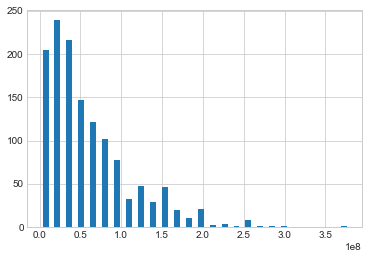

In [56]:
plt.hist(profit_df['budget(US-Dollars)'],rwidth=0.5, bins =26)
plt.show()

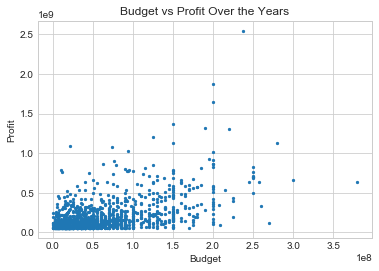

In [61]:
# Creating a scatterplot of budget and profit over the years
plt.scatter(x=profit_df['budget(US-Dollars)'], y=profit_df['profit(US-Dollars)'],s=5)
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.title('Budget vs Profit Over the Years');

From the above two distributions, it can be interpreted that most movies that turned out to be a blockbuster had budgets in the range of 10 million to 50 million US-Dollars.

<a id='conclusions'></a>
## Conclusions

>From our eploratory data analysis, following can be concluded:<br>
>-Generally, movies have average run time of 109 minutes.<br>
>-The movie industry is seeing overall growth in the revenues and total profits incurred. Good time to invest into movie industry!<br>
><br>
>Moreover we also looked at several common charecteristics of blockbuster movies. So if someone were to invest in movie industry, then he/she would probably incur high profits if he were to invest in movie that had :<br>
-Average Runtime : 113 min(not much more than a general average of 109 )<br>
-Genre : Comedy, Drama, or Action<br>
-Cast : Tom Cruise, Brad Pitt, Cameron Diaz<br>
-Director: Steven Spielberg<br>
-Approx budget ( in $ ) : 10 million to  50 million 
><br><br>
>** Assumptions :**<br>
>-Data is error-free and correct<br>
>-Data is up-to-date <br>
>-Revenue, and budget are in US-Dollars<br>
><br><br>
>**Limitations :**
> If any of the assumtptions listed above if proved unwarranted, would result into our analysis being incorrect. For example, if different movies had revenue and budget in different currencies, it would lead to discrepancies and thus incorrect analysis. Data sample is not large enough to make a conclusion about general pattern or trend of a population. That is, it covers merely small part of the whole movie database of world. Moreover, we dropped many rows because of null values, that further narrowed the dataset records and that may have affected our results. Also, there may be underlying other hidden factors that govern for the profitibilty of a movie, for example the concept and the story of movie havent been explored by us. A concept may be enough to make it earn high profits. Marketing can affect the revenue generation as well. Hence the above drawn conclusions are probable but not 100% true. However, our analysis do suggest co-relations that may exist and further research may conclude them. 